# **First week examples** - Cayetano Soneira

- Calculating $\pi$

- Error propagation for x/y when
    - x,y different gaussian
    - x,y follow a Poisson law (note this has an exact solution)
    - Plot the histogram, calculate sd, quantiles...
- Application of the inverse transform method to get a binomial and multinomial random number
- Composition method
- Mixture model
- Acceptance-rejection method

## Calculating $\pi$

In [1]:
# Define the total number as a variable.

N=1e3

pos1<-runif(N,-1,1)
pos2<-runif(N,-1,1)

z=sqrt(pos1**2+pos2**2)

# Suposed to be another way
# zz<-ifelse(sqrt(pos1**2+pos2**2)<1,1,0)

mypi<-sum(z<1)/N*4
cat("The approximation for Pi is ",mypi,"with ",N,"values.")

# plot(pos1,pos2)

The approximation for Pi is  3.172 with  1000 values.

In [2]:
Niter=10000
N=1e4
a=rep(0,Niter)

for (i in 1:Niter){
    a[i]<-sum(sqrt(runif(N,-1,1)**2+runif(N,-1,1)**2)<1)/N*4
    }

The mean approximation for Pi is  3.141524 pm 0.01633631 with  10000 values.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.080   3.131   3.142   3.142   3.152   3.207 

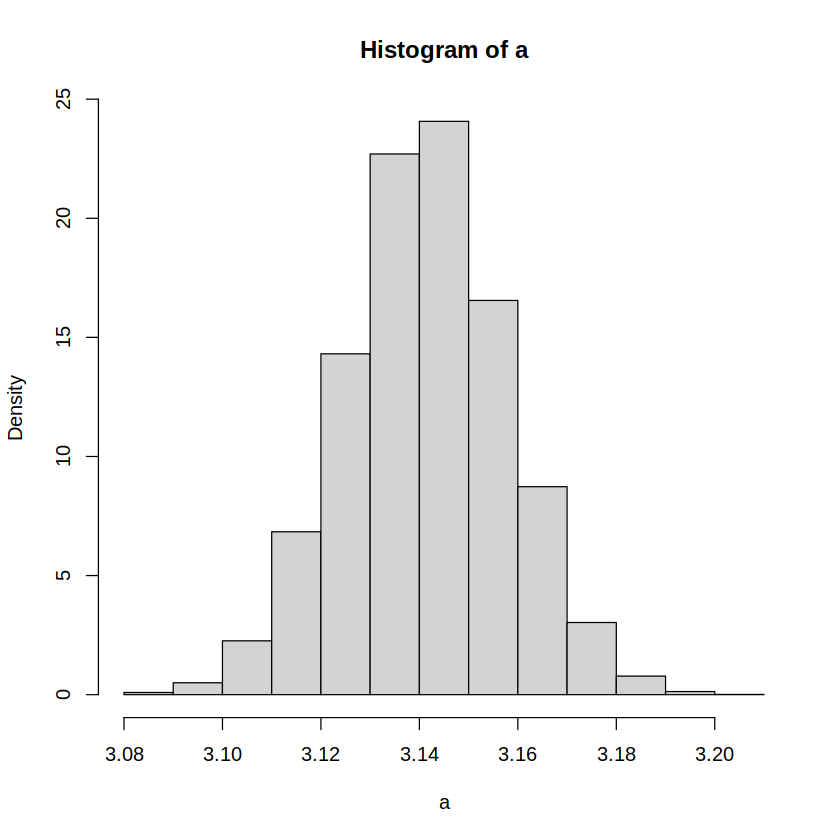

In [3]:
hist(a,freq=FALSE)
cat("The mean approximation for Pi is ",mean(a),"pm",sd(a),"with ",N,"values.")
summary(a)

## *Error* propagation

### For a gaussian

The value is  2.020566 pm 0.2315509 
The mean error propagating is 0.2299291 
The propagation error should be 0.2236068 


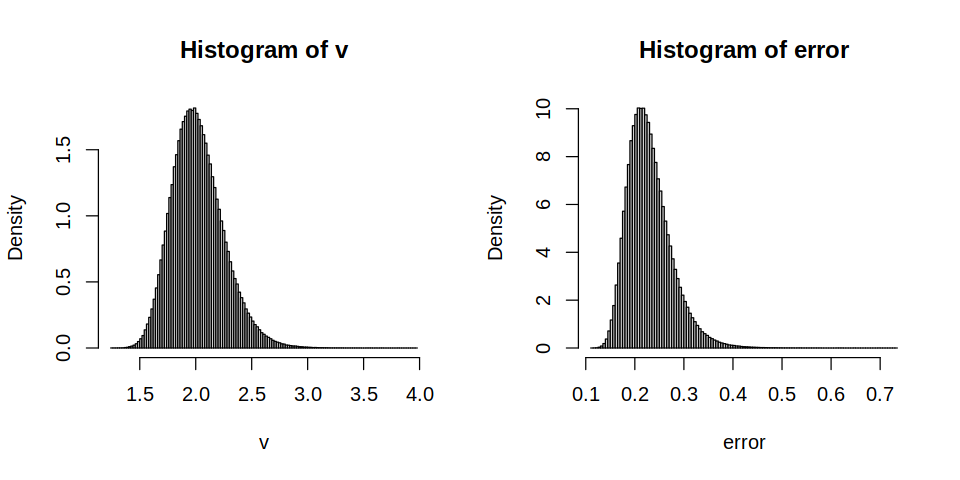

In [4]:
M=1E6

# "Errors" in the values
sd1=0.1
sd2=0.1

x=rnorm(M,2,0.1)
t=rnorm(M,1,0.1)
v=x/t

cat("The value is ",mean(v),"pm",sd(v),"\n")

error=sqrt(sd1**2/t**2+(x*sd2)**2/t**4)
cat("The mean error propagating is", mean(error),"\n")
cat("The propagation error should be",sqrt(5)*0.1,"\n")

options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
hist(v,freq=FALSE,breaks=100)
hist(error,freq=FALSE,breaks=100)

In [5]:
# quantile(v,prob=c(0.16,0.5,0.84))

# Probabilities at certain sigmas indicated as first parameter:
# pnorm(3,0,1)
# pnorm(-3,0,1)

quantile(v,prob=pnorm(c(-3,0,3),0,1))

0.1349898%        50%  99.86501% 
  1.467181   2.000161   2.928173

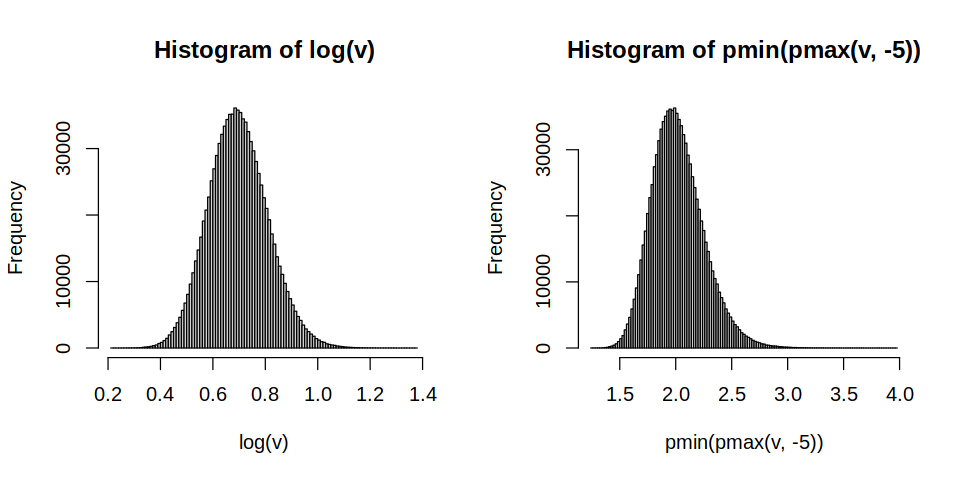

In [6]:
# Some alternative, interesting views

options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
hist(log(v),breaks=100)
# Using pmax: choose between the maximum or the number you give it
hist(pmin(pmax(v,-5)),5,breaks=100)

### Poisson

The value is  3.419522 pm 2.713178 
The mean error propagating is 0.1784646 
The propagation error should be 0.2236068 


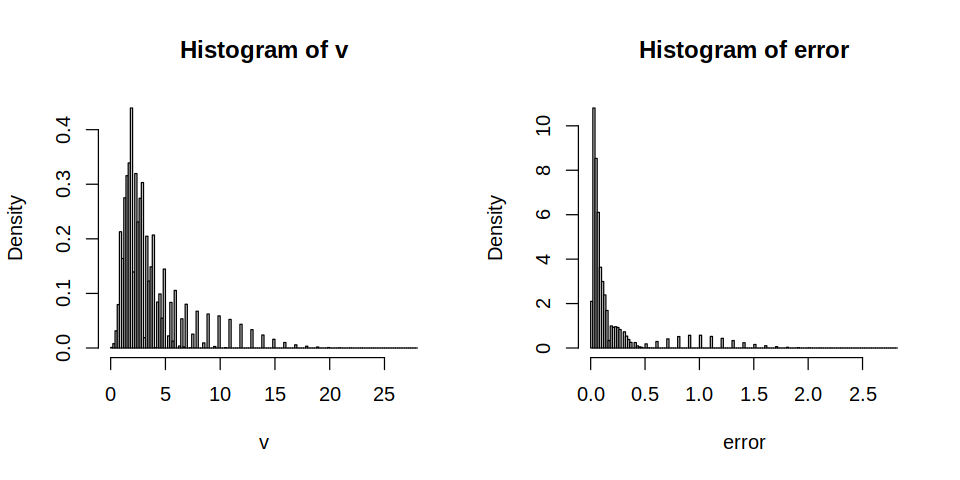

In [7]:
M=1E7

# "Errors" in the values
lambda1=10
lambda2=4

x=pmax(rpois(M,lambda1),1)
t=pmax(rpois(M,lambda2),1)
v=x/t

cat("The value is ",mean(v),"pm",sd(v),"\n")

error=sqrt(sd1**2/t**2+(x*sd2)**2/t**4)
cat("The mean error propagating is", mean(error),"\n")
cat("The propagation error should be",sqrt(5)*0.1,"\n")

options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
hist(v,freq=FALSE,breaks=100)
hist(error,freq=FALSE,breaks=100)

## Application of the inverse transform method to get a binomial and multinomial random number

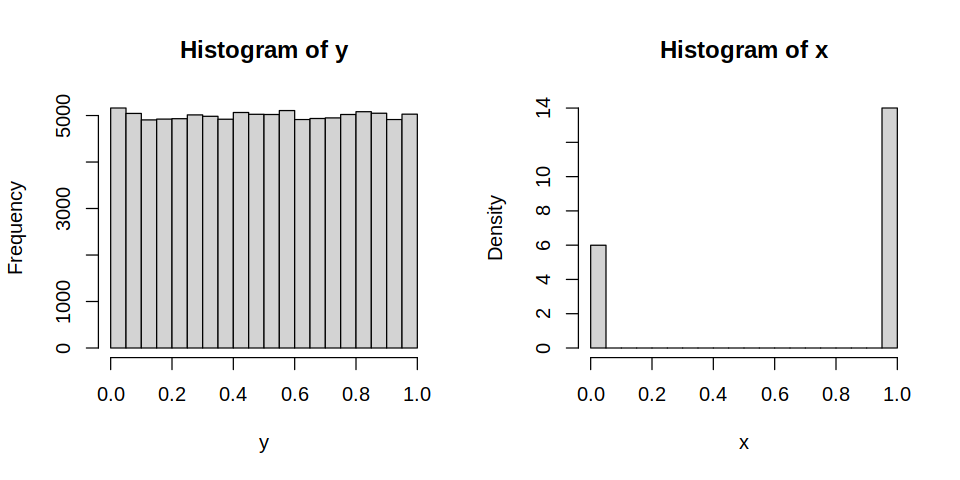

In [8]:
N=100000
p=0.3

y=runif(N,0,1)
x=ifelse(y<p,0,1)

options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
hist(y)
hist(x,freq=FALSE)

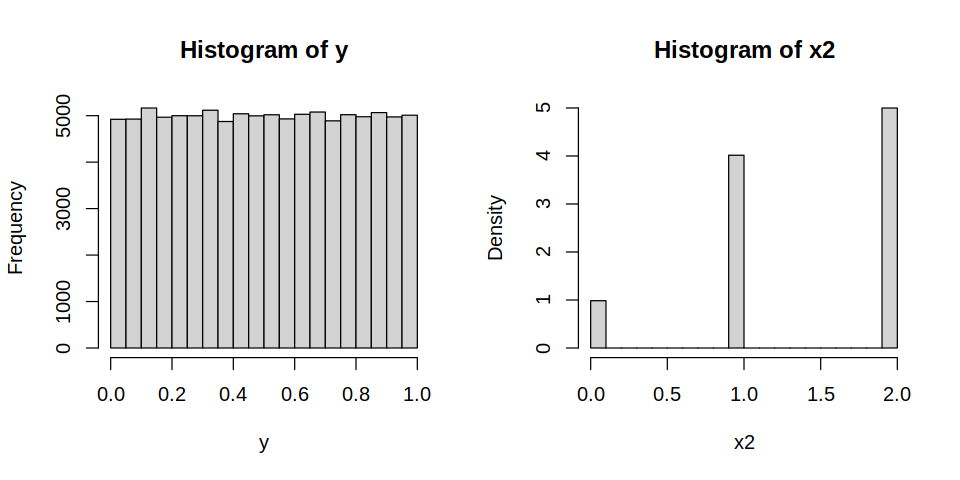

In [9]:
p1=0.1
p2=0.4
p3=0.5

x0<-0
x1<-1
x2<-2

y <- runif(N,0,1)
x2 <- ifelse(y<p1,x0,ifelse(y<p1+p2,x1,x2))

options(repr.plot.width=8,repr.plot.height=4)
par(mfrow=c(1,2))
hist(y)
hist(x2,freq=FALSE)

# Also pretty cool:
x = runif(N,0,1)
xb <- (y<0.3)*1+(x>0.8)*3+(x<0.8 & x> 0.3)*2

## Composition method

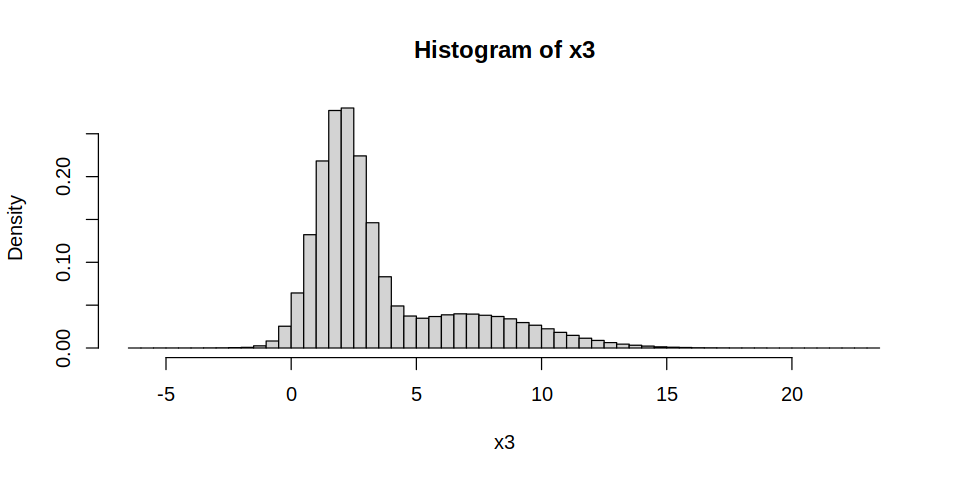

In [10]:
N=1e6
mu1<-1
s1<-2
mu2<-7
s2<-2

p=0.7

y=runif(N,0,1)
n1<-rnorm(N,mu1,s1)
n2<-rnorm(N,mu2,s2)

x3<-ifelse(y<p,n1,n2)

# Very compact!!
x3<-ifelse(runif(1e6,0,1)<0.7,rnorm(1e6,2,1),rnorm(1e6,7,3))

hist(x3,freq=FALSE,breaks=100)

## Mixture model

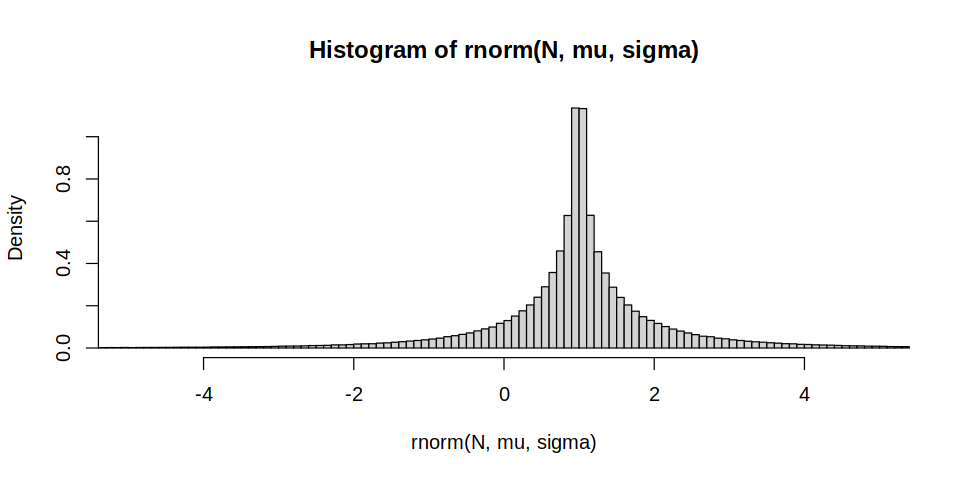

In [11]:
N=1e6
mu=0*matrix(N,1)+1
rate=1

sigma=rexp(N,rate)
hist(rnorm(N,mu,sigma),freq=FALSE,breaks=1000,xlim = c(-5, 5))

## Acceptance-rejection method

[1] 0.499977

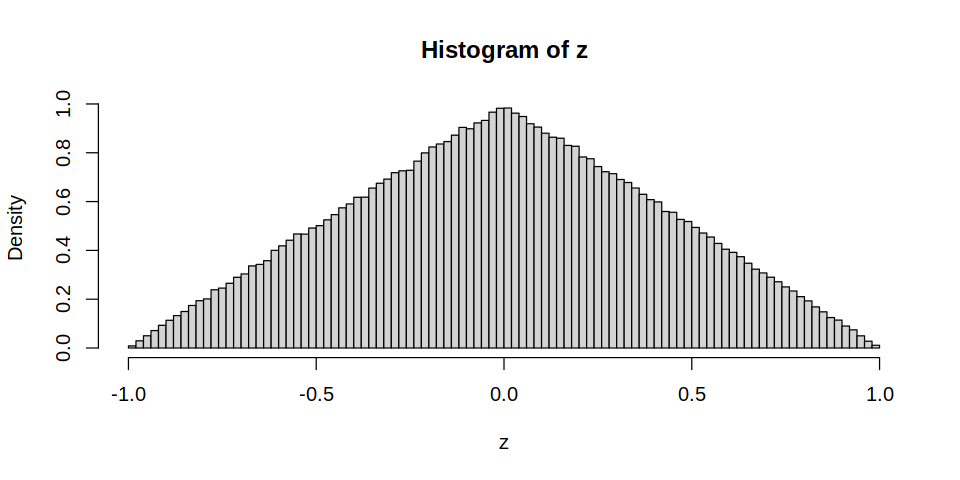

In [12]:
N=1e6

x=runif(N,-1,1)
y=runif(N,0,1)

z<-x[y<1-abs(x)]

#Correction factor has to compensate for:
length(z)/length(x)

hist(z,freq=FALSE,breaks=100)